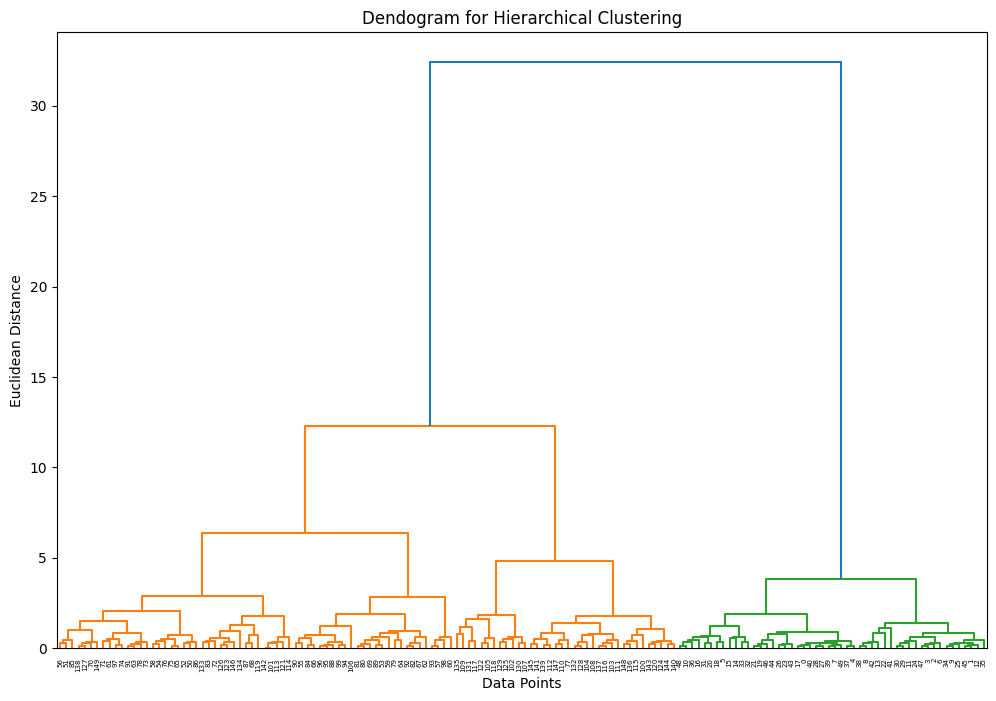

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['cluster'] = agg_cluster.fit_predict(df)

plt.figure(figsize=(12,8))
linked = linkage(df.iloc[:, :-1], 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [9]:
from scipy.cluster.hierarchy import cophenet
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist

coph_corr, _ = cophenet(linked, pdist(df.iloc[:, :-1]))

silhouette_avg = silhouette_score(df.iloc[:, :-1], df['cluster'])
print(f'Cophenetic Correlation Coefficient: {coph_corr}')
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg}')

Cophenetic Correlation Coefficient: 0.8728283153305715
Silhouette Score for Hierarchical Clustering: 0.5543236611296419


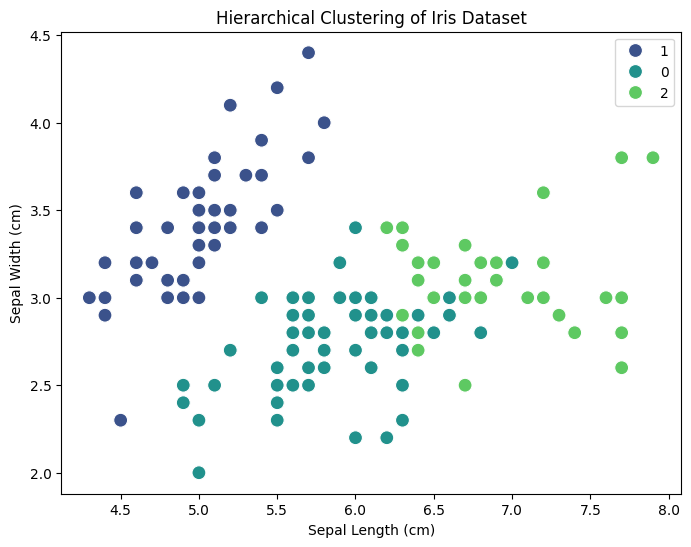

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['cluster'] = agg_cluster.fit_predict(df)

df['cluster'] = df['cluster'].astype(str)

plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal length (cm)',  y='sepal width (cm)', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()
